## Importing Data

In [264]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [265]:
# Importing required packages
import pandas as pd, numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [266]:
#Importing the Demographic and credit bureau data
demographic = pd.read_csv("Demographic data.csv")
credit = pd.read_csv("Credit Bureau data.csv")

## Inspecting the Dataframe

In [267]:
#checking type of each column
print(credit.info())
print(demographic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [268]:
print(credit.shape)
print(demographic.shape)

(71295, 19)
(71295, 12)


In [269]:
#Checking if there are any Duplicate rows
print(credit['Application ID'].nunique())
print(demographic['Application ID'].nunique())
#there are 3 duplicate rows

71292
71292


In [270]:
#Let's check the rows that are duplicate
credit_duplicate = pd.DataFrame(credit[credit.duplicated(['Application ID'],keep=False)])
demographic_duplicate = pd.DataFrame(demographic[demographic.duplicated(['Application ID'],keep=False)])

credit_duplicate.sort_values('Application ID')

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
5243,653287861,0,0,0,0,0,0,15.0,0.0,0,0,0,0,0,0.0,10494.0,2,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
48602,671989187,1,2,3,2,2,3,63.0,2.0,6,1,4,3,5,0.0,806473.0,7,1,0.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0
24386,765011468,0,0,0,0,0,0,11.0,1.0,2,0,1,2,2,0.0,212656.0,3,0,0.0
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0


In [271]:
demographic_duplicate.sort_values('Application ID')

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0


## Data Preparation

In [272]:
##Dropping rows with Duplicate Application ID

credit = credit.drop_duplicates(subset ="Application ID", keep=False) 
demographic = demographic.drop_duplicates(subset ="Application ID", keep=False) 

print(credit.shape)
print(demographic.shape)

(71289, 19)
(71289, 12)


In [273]:
#Checking the no. of null values for each variable
print(credit.isnull().sum())
print(demographic.isnull().sum())

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [274]:
#Dropping rows where Target variable i.e. Performance Tag is null. These will be used as Reject Population for Model Evaluation.

credit1 = credit[~credit['Performance Tag'].isnull()]
demographic1 = demographic[~demographic['Performance Tag'].isnull()]

In [275]:
#Imputing missing values in `Avgas CC Utilization in last 12 months` with 0 as they are those that don't have any CC utilization
#and one missing value in `No of trades opened in last 6 months` with 0 as `No of trades opened in last 12 months` is 0 for it.

credit1.replace({'Avgas CC Utilization in last 12 months' : { np.nan : 0}}, inplace=True)
credit1.replace({'No of trades opened in last 6 months' : { np.nan : 0}}, inplace=True)

In [276]:
#Creating demographic_new and imputing missing value with others
demographic2 = demographic1.copy()

demographic2.replace({'Education' : { np.nan : 'Others'}, 'Profession ' : { np.nan : 'Others'},
                        'Type of residence' : { np.nan : 'Others'}}, inplace=True)

In [277]:
#Creating final dataframe by merging demographic_new and credit data
demographic_new = demographic2.drop(columns = 'Performance Tag')
final = demographic_new.merge(credit1, on='Application ID')
final.shape

(69864, 29)

In [278]:
#Removing rows with age<18
final = final[~(final['Age']<18)]

In [279]:
#Changing Performance Tag's type to int
final['Performance Tag'] = final['Performance Tag'].astype('int')

In [280]:
final.isnull().sum()

Application ID                                                       0
Age                                                                  0
Gender                                                               1
Marital Status (at the time of application)                          5
No of dependents                                                     2
Income                                                               0
Education                                                            0
Profession                                                           0
Type of residence                                                    0
No of months in current residence                                    0
No of months in current company                                      0
No of times 90 DPD or worse in last 6 months                         0
No of times 60 DPD or worse in last 6 months                         0
No of times 30 DPD or worse in last 6 months                         0
No of 

## EDA

#### Age

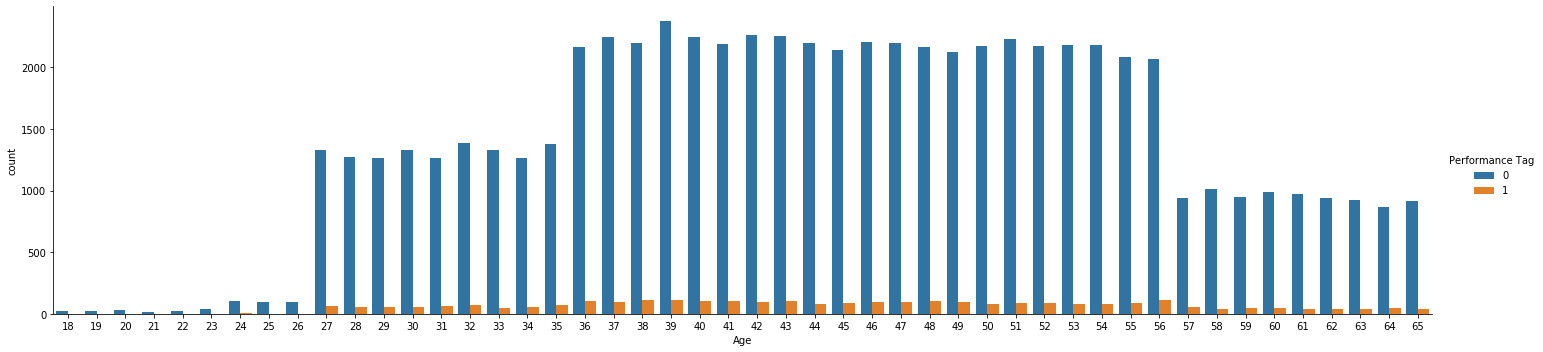

In [281]:
#factor plot of Age wrt Performance Tag 
sns.factorplot(x = "Age", hue = "Performance Tag", data = final, kind = "count", height=5, aspect=4)
plt.show()

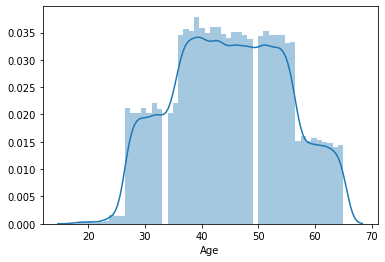

In [282]:
sns.distplot(final.Age)
plt.show()

In [283]:
final.Age.describe(percentiles=[0.01,0.10,0.20,0.25,0.50,0.75,0.95,0.99])

count    69799.000000
mean        45.027422
std          9.877832
min         18.000000
1%          27.000000
10%         31.000000
20%         36.000000
25%         38.000000
50%         45.000000
75%         53.000000
95%         62.000000
99%         65.000000
max         65.000000
Name: Age, dtype: float64

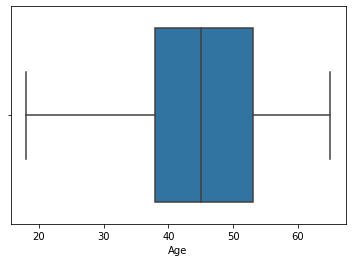

In [284]:
sns.boxplot(x='Age', data=final)
plt.show()

In [285]:
#bucketing the age groups into brackets of 10
age = final[['Age', 'Performance Tag']]
bins = np.arange(18,age['Age'].max() + 10, 10)
age['age_bins'] = pd.cut(age['Age'], bins, include_lowest=True)
No_of_Customers = age.groupby('age_bins')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = age[age['Performance Tag']==1].groupby('age_bins')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_age = No_of_Customers.merge(No_of_Defaulters, on='age_bins')
agg_age['default_rate'] = 100*(agg_age['No.of_defaulters']/agg_age['No.of_customers']).round(3)
agg_age.sort_values(by='default_rate', ascending=False)

,age_bins,No.of_customers,No.of_defaulters,default_rate
1,"(28.0, 38.0]",16566,731,4.4
2,"(38.0, 48.0]",23236,995,4.3
4,"(58.0, 68.0]",6848,292,4.3
3,"(48.0, 58.0]",19983,805,4.0
0,"(17.999, 28.0]",3166,123,3.9


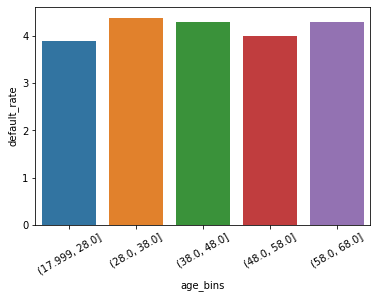

In [286]:
ax = sns.barplot(x='age_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Gender

In [287]:
final.Gender.unique()

array(['F', 'M', nan], dtype=object)

In [288]:
No_of_Customers = final.groupby('Gender')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = final[final['Performance Tag']==1].groupby('Gender')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_gender = No_of_Customers.merge(No_of_Defaulters, on='Gender')
agg_gender['default_rate'] = 100*(agg_gender['No.of_defaulters']/agg_gender['No.of_customers']).round(3)
agg_gender.sort_values(by='default_rate', ascending=False)

,Gender,No.of_customers,No.of_defaulters,default_rate
0,F,16490,718,4.4
1,M,53308,2228,4.2


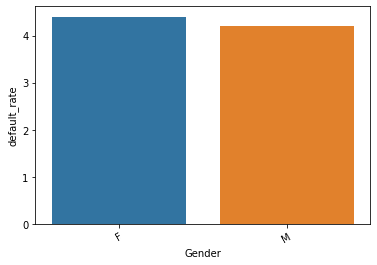

In [289]:
ax = sns.barplot(x='Gender', y='default_rate', data=agg_gender)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Marital Status (at the time of application)

In [290]:
final['Marital Status (at the time of application)'].unique()

array(['Married', 'Single', nan], dtype=object)

In [291]:
No_of_Customers = final.groupby('Marital Status (at the time of application)')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = final[final['Performance Tag']==1].groupby('Marital Status (at the time of application)')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_marital = No_of_Customers.merge(No_of_Defaulters, on='Marital Status (at the time of application)')
agg_marital['default_rate'] = 100*(agg_marital['No.of_defaulters']/agg_marital['No.of_customers']).round(3)
agg_marital.sort_values(by='default_rate', ascending=False)

,Marital Status (at the time of application),No.of_customers,No.of_defaulters,default_rate
1,Single,10292,444,4.3
0,Married,59502,2502,4.2


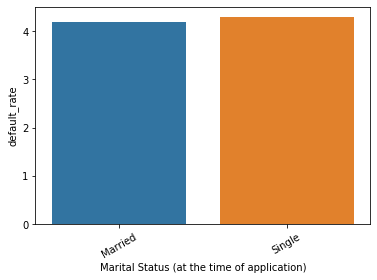

In [292]:
ax = sns.barplot(x='Marital Status (at the time of application)', y='default_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### No of dependents

In [293]:
final['No of dependents'].unique()

array([ 2.,  4.,  1.,  5.,  3., nan])

In [294]:
dependent=final.dropna(subset=['No of dependents']).copy()

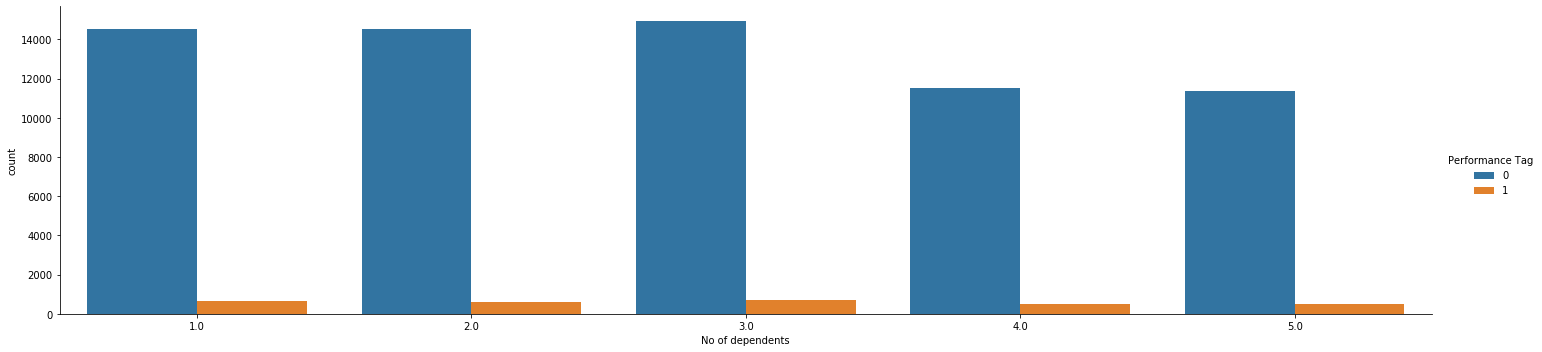

In [295]:
sns.factorplot(x = "No of dependents", hue = "Performance Tag", data = dependent, kind = "count", height=5, aspect=4)
plt.show()

In [296]:
No_of_Customers = final.groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = final[final['Performance Tag']==1].groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_dependent = No_of_Customers.merge(No_of_Defaulters, on='No of dependents')
agg_dependent['default_rate'] = 100*(agg_dependent['No.of_defaulters']/agg_dependent['No.of_customers']).round(3)
agg_dependent.sort_values(by='default_rate', ascending=False)

,No of dependents,No.of_customers,No.of_defaulters,default_rate
0,1.0,15200,667,4.4
2,3.0,15626,694,4.4
4,5.0,11873,503,4.2
3,4.0,11994,494,4.1
1,2.0,15104,588,3.9


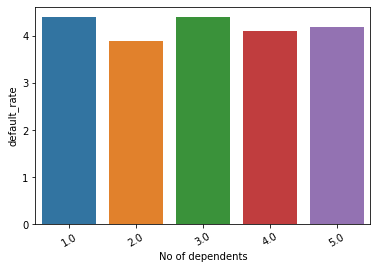

In [297]:
ax = sns.barplot(x='No of dependents', y='default_rate', data=agg_dependent)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Income

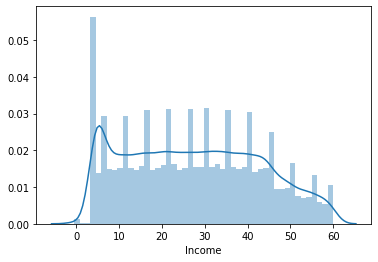

In [298]:
sns.distplot(final.Income)
plt.show()

In [299]:
final['Income'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    69799.000000
mean        27.407742
std         15.478580
min         -0.500000
25%         14.000000
50%         27.000000
75%         40.000000
95%         54.000000
99%         59.000000
max         60.000000
Name: Income, dtype: float64

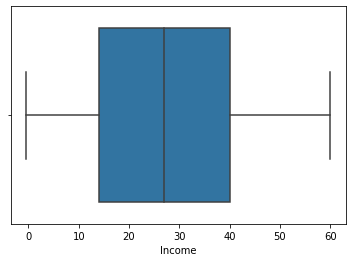

In [300]:
sns.boxplot(x='Income', data=final)
plt.show()

In [301]:
#bucketing the income into brackets of 10
income = final[['Income', 'Performance Tag']]
bins = np.arange(0,income['Income'].max() + 10, 10)
income['income_bins'] = pd.cut(income['Income'], bins, include_lowest=True)
No_of_Customers = income.groupby('income_bins')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = income[income['Performance Tag']==1].groupby('income_bins')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_income = No_of_Customers.merge(No_of_Defaulters, on='income_bins')
agg_income['default_rate'] = 100*(agg_income['No.of_defaulters']/agg_income['No.of_customers']).round(3)
agg_income.sort_values(by='default_rate', ascending=False)

,income_bins,No.of_customers,No.of_defaulters,default_rate
0,"(-0.001, 10.0]",12755,711,5.6
1,"(10.0, 20.0]",13336,604,4.5
2,"(20.0, 30.0]",13569,601,4.4
3,"(30.0, 40.0]",13611,483,3.5
4,"(40.0, 50.0]",10839,384,3.5
5,"(50.0, 60.0]",5609,161,2.9


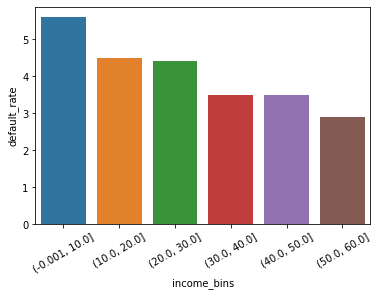

In [302]:
ax = sns.barplot(x='income_bins', y='default_rate', data=agg_income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Education

In [303]:
final.Education.value_counts()

Professional    24362
Masters         23465
Bachelor        17280
Phd              4455
Others            237
Name: Education, dtype: int64

In [304]:
No_of_Customers = final.groupby('Education')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = final[final['Performance Tag']==1].groupby('Education')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_edu = No_of_Customers.merge(No_of_Defaulters, on='Education')
agg_edu['default_rate'] = 100*(agg_edu['No.of_defaulters']/agg_edu['No.of_customers']).round(3)
agg_edu.sort_values(by='default_rate', ascending=False)

,Education,No.of_customers,No.of_defaulters,default_rate
2,Others,237,13,5.5
0,Bachelor,17280,741,4.3
1,Masters,23465,998,4.3
3,Phd,4455,183,4.1
4,Professional,24362,1011,4.1


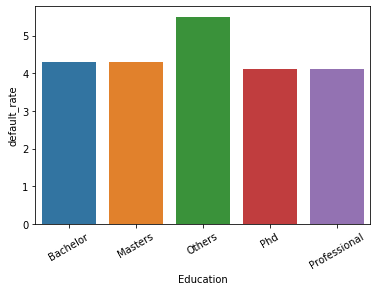

In [305]:
ax = sns.barplot(x='Education', y='default_rate', data=agg_edu)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Profession

In [306]:
final['Profession '].value_counts()

SAL        39636
SE_PROF    16236
SE         13915
Others        12
Name: Profession , dtype: int64

In [307]:
No_of_Customers = final.groupby('Profession ')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = final[final['Performance Tag']==1].groupby('Profession ')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_profession = No_of_Customers.merge(No_of_Defaulters, on='Profession ')
agg_profession['default_rate'] = 100*(agg_profession['No.of_defaulters']/agg_profession['No.of_customers']).round(3)
agg_profession.sort_values(by='default_rate', ascending=False)

,Profession,No.of_customers,No.of_defaulters,default_rate
1,SE,13915,641,4.6
2,SE_PROF,16236,676,4.2
0,SAL,39636,1629,4.1


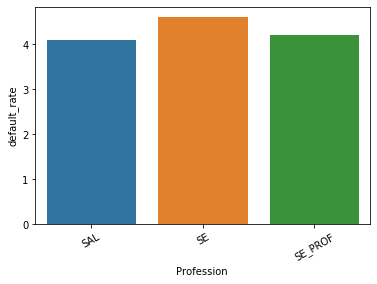

In [308]:
ax = sns.barplot(x='Profession ', y='default_rate', data=agg_profession)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Type of residence

In [309]:
final['Type of residence'].value_counts()

Rented                 52241
Owned                  13986
Living with Parents     1766
Company provided        1600
Others                   206
Name: Type of residence, dtype: int64

In [310]:
No_of_Customers = final.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = final[final['Performance Tag']==1].groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_type_res = No_of_Customers.merge(No_of_Defaulters, on='Type of residence')
agg_type_res['default_rate'] = 100*(agg_type_res['No.of_defaulters']/agg_type_res['No.of_customers']).round(3)
agg_type_res.sort_values(by='default_rate', ascending=False)

,Type of residence,No.of_customers,No.of_defaulters,default_rate
0,Company provided,1600,73,4.6
1,Living with Parents,1766,80,4.5
3,Owned,13986,592,4.2
4,Rented,52241,2196,4.2
2,Others,206,5,2.4


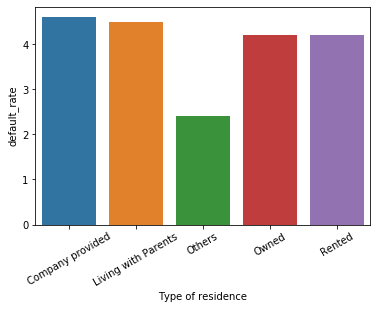

In [311]:
ax = sns.barplot(x='Type of residence', y='default_rate', data=agg_type_res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### No of months in current residence

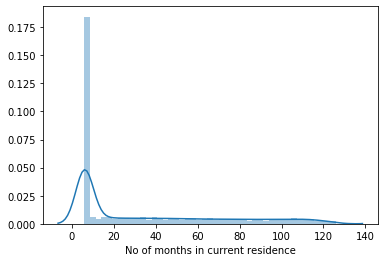

In [312]:
sns.distplot(final['No of months in current residence'])
plt.show()

In [313]:
final['No of months in current residence'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    69799.000000
mean        34.570624
std         36.824810
min          6.000000
25%          6.000000
50%         10.000000
75%         61.000000
95%        110.000000
99%        122.000000
max        126.000000
Name: No of months in current residence, dtype: float64

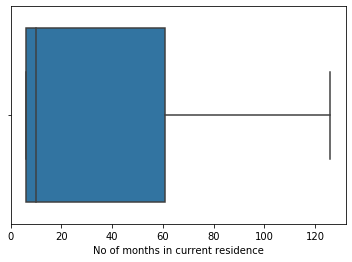

In [314]:
sns.boxplot(x='No of months in current residence', data=final)
plt.show()

#### No of months in current company

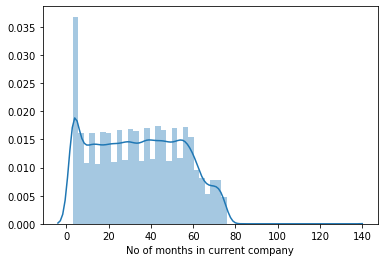

In [315]:
sns.distplot(final['No of months in current company'])
plt.show()

In [316]:
final['No of months in current company'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    69799.000000
mean        34.194258
std         20.351635
min          3.000000
25%         17.000000
50%         34.000000
75%         51.000000
95%         68.000000
99%         74.000000
max        133.000000
Name: No of months in current company, dtype: float64

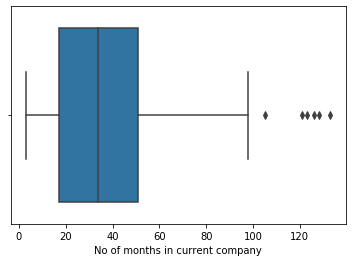

In [317]:
sns.boxplot(x='No of months in current company', data=final)
plt.show()

In [318]:
#Imputing No of months in current company greater than 74 with 74 as they are outliers and comprise only 1% of total
final['No of months in current company'][final['No of months in current company']>74] = 74

#### Avgas CC Utilization in last 12 months

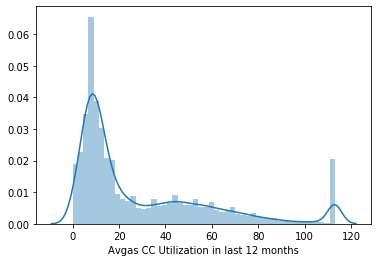

In [319]:
sns.distplot(final['Avgas CC Utilization in last 12 months'])
plt.show()

In [320]:
final['Avgas CC Utilization in last 12 months'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    69799.000000
mean        28.848035
std         29.514185
min          0.000000
25%          8.000000
50%         14.000000
75%         44.000000
95%        103.000000
99%        113.000000
max        113.000000
Name: Avgas CC Utilization in last 12 months, dtype: float64

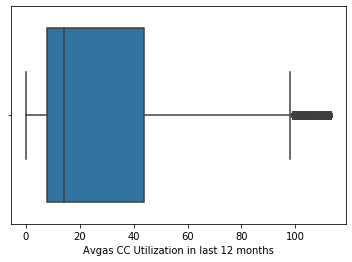

In [321]:
sns.boxplot(x='Avgas CC Utilization in last 12 months', data=final)
plt.show()

In [322]:
#bucketing the CC utilization into brackets of 10
cc_util = final[['Avgas CC Utilization in last 12 months', 'Performance Tag']]
bins = np.arange(0,cc_util['Avgas CC Utilization in last 12 months'].max() + 10, 10)
cc_util['cc_util_bins'] = pd.cut(cc_util['Avgas CC Utilization in last 12 months'], bins, include_lowest=True)
No_of_Customers = cc_util.groupby('cc_util_bins')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = cc_util[income['Performance Tag']==1].groupby('cc_util_bins')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_cc_util = No_of_Customers.merge(No_of_Defaulters, on='cc_util_bins')
agg_cc_util['default_rate'] = 100*(agg_cc_util['No.of_defaulters']/agg_cc_util['No.of_customers']).round(3)
agg_cc_util.sort_values(by='default_rate', ascending=False)

,cc_util_bins,No.of_customers,No.of_defaulters,default_rate
7,"(70.0, 80.0]",2023,159,7.9
4,"(40.0, 50.0]",4908,379,7.7
6,"(60.0, 70.0]",3105,226,7.3
5,"(50.0, 60.0]",4122,285,6.9
3,"(30.0, 40.0]",4222,287,6.8
8,"(80.0, 90.0]",1117,76,6.8
2,"(20.0, 30.0]",4943,302,6.1
9,"(90.0, 100.0]",535,31,5.8
10,"(100.0, 110.0]",415,23,5.5
11,"(110.0, 120.0]",3209,154,4.8


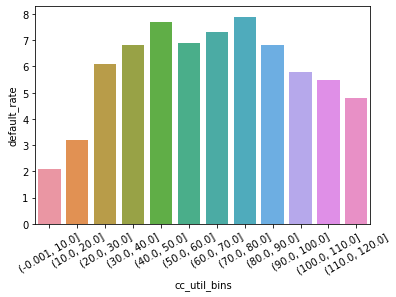

In [323]:
ax = sns.barplot(x='cc_util_bins', y='default_rate', data=agg_cc_util)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Outstanding Balance

In [324]:
outstanding_bal=final.dropna(subset=['Outstanding Balance']).copy()

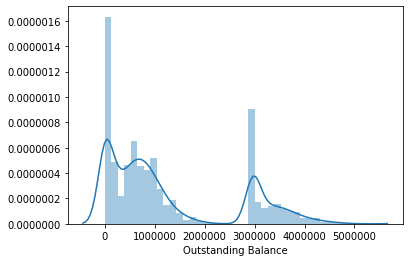

In [325]:
sns.distplot(outstanding_bal['Outstanding Balance'])
plt.show()

In [326]:
round(outstanding_bal['Outstanding Balance'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99]))

count      69527.0
mean     1253146.0
std      1286035.0
min            0.0
25%       208498.0
50%       774194.0
75%      2926013.0
95%      3650682.0
99%      4250991.0
max      5218801.0
Name: Outstanding Balance, dtype: float64

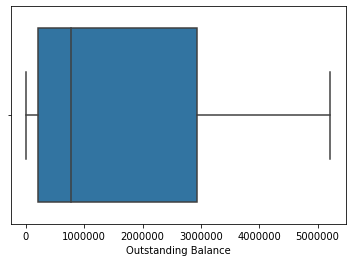

In [327]:
sns.boxplot(x='Outstanding Balance', data=outstanding_bal)
plt.show()

In [328]:
#bucketing the Outstanding Balance into brackets of 1000000
out_bal = outstanding_bal[['Outstanding Balance', 'Performance Tag']]
bins = np.arange(0,out_bal['Outstanding Balance'].max() + 1000000, 1000000)
out_bal['out_bal_bins'] = pd.cut(out_bal['Outstanding Balance'], bins, include_lowest=True)
No_of_Customers = out_bal.groupby('out_bal_bins')['Performance Tag'].count().reset_index(name = 'No.of_customers')
No_of_Defaulters = out_bal[income['Performance Tag']==1].groupby('out_bal_bins')['Performance Tag'].count().reset_index(name = 'No.of_defaulters')
agg_out_bal = No_of_Customers.merge(No_of_Defaulters, on='out_bal_bins')
agg_out_bal['default_rate'] = 100*(agg_out_bal['No.of_defaulters']/agg_out_bal['No.of_customers']).round(3)
agg_out_bal.sort_values(by='default_rate', ascending=False)

,out_bal_bins,No.of_customers,No.of_defaulters,default_rate
5,"(5000000.0, 6000000.0]",12,2,16.7
1,"(1000000.0, 2000000.0]",8192,478,5.8
3,"(3000000.0, 4000000.0]",8369,408,4.9
4,"(4000000.0, 5000000.0]",1474,67,4.5
0,"(-0.001, 1000000.0]",43198,1851,4.3
2,"(2000000.0, 3000000.0]",8282,132,1.6


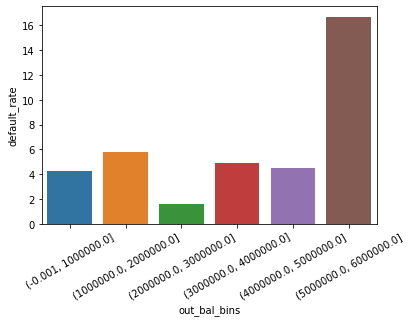

In [329]:
ax = sns.barplot(x='out_bal_bins', y='default_rate', data=agg_out_bal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

In [330]:
#Converting in object type
master_df1 = final.copy()

master_df1['Presence of open auto loan'] = master_df1['Presence of open auto loan'].astype('object')
master_df1['Presence of open home loan'] = master_df1['Presence of open home loan'].astype('object')

## WOE & IV Analysis

In [331]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [332]:
final_iv, IV = data_vars(master_df1.iloc[:,1:-1],master_df1['Performance Tag'])

In [333]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,18,40,24569,1070.0,0.043551,23499.0,0.956449,0.363204,0.351503,0.032749,0.000666
1,Age,41,50,22872,958.0,0.041885,21914.0,0.958115,0.325187,0.327794,-0.007985,0.000666
2,Age,51,65,22358,918.0,0.041059,21440.0,0.958941,0.311609,0.320704,-0.028768,0.000666
3,Gender,F,F,16490,718.0,0.043542,15772.0,0.956458,0.243720,0.235921,0.032526,0.000333
4,Gender,M,M,53308,2228.0,0.041795,51080.0,0.958205,0.756280,0.764064,-0.010241,0.000333
5,Gender,NaN,NaN,1,0.0,0.000000,1.0,1.000000,0.000000,0.000015,0.000000,0.000333
6,Marital Status (at the time of application),Married,Married,59502,2502.0,0.042049,57000.0,0.957951,0.849287,0.852617,-0.003913,0.000091
7,Marital Status (at the time of application),Single,Single,10292,444.0,0.043140,9848.0,0.956860,0.150713,0.147308,0.022849,0.000091
8,Marital Status (at the time of application),NaN,NaN,5,0.0,0.000000,5.0,1.000000,0.000000,0.000075,0.000000,0.000091
9,No of dependents,1,3,45930,1949.0,0.042434,43981.0,0.957566,0.661575,0.657876,0.005607,0.000060


In [344]:
IV.sort_values('IV', ascending=False).head()

,VAR_NAME,IV
1,Avgas CC Utilization in last 12 months,0.271008
19,No of trades opened in last 12 months,0.257478
6,No of Inquiries in last 12 months (excluding h...,0.229256
25,Total No of Trades,0.189994
13,No of times 30 DPD or worse in last 12 months,0.188111


Average CC Utilization in last 12 months, No of trades opened in last 12 months, No of inquiries in last 12 months, Total trades, No of times 30 DPD in last 12 months are key important variables.

#### Creating new columns with prefix `woe_` by replacing values with corresponding WOE value

In [335]:
#Imputing missing values in categorical variables with `NA` and continuous variables with `-10`
master_df2 = master_df1.copy()

master_df2.replace({'Gender' : { np.nan : 'NA'}, 'Marital Status (at the time of application)' : { np.nan : 'NA'}},
                  inplace=True)

master_df2.replace({'No of dependents' : { np.nan : -10}, 'Presence of open home loan' : { np.nan : -10},
                  'Outstanding Balance' : { np.nan : -10}}, inplace=True)

#Replacing MAX_VALUE and MIN_VALUE with -10 for continuous variables and `NA` for categorical variables
final_iv1 = final_iv.copy()

final_iv1.replace({'MAX_VALUE' : { np.nan : 'NA'}}, inplace=True)
final_iv1.replace({'MIN_VALUE' : { np.nan : 'NA'}}, inplace=True)
final_iv1.loc[(final_iv1['VAR_NAME'].isin (['No of dependents', 'Presence of open home loan', 'Outstanding Balance'])) & (final_iv1['MAX_VALUE'] == 'NA'), 'MAX_VALUE'] = -10
final_iv1.loc[(final_iv1['VAR_NAME'].isin (['No of dependents', 'Presence of open home loan', 'Outstanding Balance'])) & (final_iv1['MIN_VALUE'] == 'NA'), 'MIN_VALUE'] = -10



In [336]:
final_iv1

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,18,40,24569,1070.0,0.043551,23499.0,0.956449,0.363204,0.351503,0.032749,0.000666
1,Age,41,50,22872,958.0,0.041885,21914.0,0.958115,0.325187,0.327794,-0.007985,0.000666
2,Age,51,65,22358,918.0,0.041059,21440.0,0.958941,0.311609,0.320704,-0.028768,0.000666
3,Gender,F,F,16490,718.0,0.043542,15772.0,0.956458,0.243720,0.235921,0.032526,0.000333
4,Gender,M,M,53308,2228.0,0.041795,51080.0,0.958205,0.756280,0.764064,-0.010241,0.000333
5,Gender,NA,NA,1,0.0,0.000000,1.0,1.000000,0.000000,0.000015,0.000000,0.000333
6,Marital Status (at the time of application),Married,Married,59502,2502.0,0.042049,57000.0,0.957951,0.849287,0.852617,-0.003913,0.000091
7,Marital Status (at the time of application),Single,Single,10292,444.0,0.043140,9848.0,0.956860,0.150713,0.147308,0.022849,0.000091
8,Marital Status (at the time of application),NA,NA,5,0.0,0.000000,5.0,1.000000,0.000000,0.000075,0.000000,0.000091
9,No of dependents,1,3,45930,1949.0,0.042434,43981.0,0.957566,0.661575,0.657876,0.005607,0.000060


In [337]:
transform_vars_list = master_df2.columns.difference(['Application ID', 'Performance Tag'])
transform_vars_list

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education', 'Gender',
       'Income', 'Marital Status (at the time of application)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
       'Presence of open auto loan', 'Presence of open home

In [338]:
#define function to add columns having WOE values 
def woe_columns(df,final_iv,vars_list):
    transform_prefix = 'woe_' 
    for var in vars_list:
        small_df = final_iv[final_iv['VAR_NAME'] == var]
        transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
        replace_cmd = ''
        replace_cmd1 = ''
        for i in sorted(transform_dict.items()):
            replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
            replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
        replace_cmd = replace_cmd + '0'
        replace_cmd1 = replace_cmd1 + '0'
        if replace_cmd != '0':
            try:
                df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))
            except:
                df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd1))

In [339]:
#Creating copy of data and calling the above defined dunction
master_df3 = master_df2.copy()
woe_columns(master_df3,final_iv1,transform_vars_list)

In [340]:
#Final WOE dataset
woe_data = master_df3.copy()

In [341]:
woe_data.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presen

## Model Building

In [342]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression using woe data of Demographic variables

In [343]:
#creating list col which will be used to extract Demographic variables with woe data
col = []
for i in list(demographic2.columns[1:-1]):
    col1 = "woe_" + i
    col.append(col1)
col.append('Application ID')
col

['woe_Age',
 'woe_Gender',
 'woe_Marital Status (at the time of application)',
 'woe_No of dependents',
 'woe_Income',
 'woe_Education',
 'woe_Profession ',
 'woe_Type of residence',
 'woe_No of months in current residence',
 'woe_No of months in current company',
 'Application ID']

In [80]:
demographic_woe = woe_data[col]
X_demographic_woe = demographic_woe.copy()
X_demographic_woe = X_demographic_woe.drop(['Application ID'],axis=1)
y_demographic = final['Performance Tag']

In [84]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train_demographic, X_test_demographic, y_train_demographic, y_test_demographic = train_test_split(X_demographic_woe, y_demographic, train_size=0.7,test_size=0.3,random_state=100)  

In [85]:
from sklearn.linear_model import LogisticRegression
# logistic regression
logistic = LogisticRegression(class_weight='balanced')

# hyperparameter space
demo_params = {'C': [0.1, 0.5, 1, 2], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
demographic_model = GridSearchCV(estimator=logistic, cv=folds, param_grid=demo_params, scoring='roc_auc')

In [86]:
# fitting model
demographic_model.fit(X_train_demographic, y_train_demographic)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 2], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [87]:
demographic_model.best_score_, demographic_model.best_params_

(0.5817305755418849, {'C': 0.1, 'penalty': 'l2'})

In [88]:
# predicting default on train data
y_train_pred_demo = demographic_model.predict(X_train_demographic)

# confusion matrix for train data
cm_demo = confusion_matrix(y_train_demographic, y_train_pred_demo)
print(cm_demo)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_demographic, y_train_pred_demo, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# area under curve
y_train_pred_prob_demo = demographic_model.predict_proba(X_train_demographic)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_demographic, y_train_pred_prob_demo),2))

[[26188 20612]
 [  896  1163]]
Sensitivity: 	0.56
Specificity: 	0.56
AUC:    	 0.58


In [89]:
# predicting default on test data
y_test_pred_demo = demographic_model.predict(X_test_demographic)

# confusion matrix for test data
cm_demo1 = confusion_matrix(y_test_demographic, y_test_pred_demo)
print(cm_demo1)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_demographic, y_test_pred_demo, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# area under curve
y_test_pred_prob_demo = demographic_model.predict_proba(X_test_demographic)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test_demographic, y_test_pred_prob_demo),2))

[[11183  8870]
 [  362   525]]
Sensitivity: 	0.59
Specificity: 	0.56
AUC:    	 0.59


### Creating model using the original Demographic variables

In [90]:
#One hot encoding for the categorical variables
demographic_new1=final[demographic2.columns]

dummy = pd.get_dummies(demographic_new1[['Gender', 'Marital Status (at the time of application)', 'Education',
                                         'Profession ', 'Type of residence']], drop_first=True)

# Adding dummies created above to the demographic_new1 dataframe
demographic_new1 = pd.concat([demographic_new1, dummy], axis=1)

demographic_new1 = demographic_new1.drop(['Gender', 'Marital Status (at the time of application)', 'Education',
                                         'Profession ', 'Type of residence'], axis=1)

In [91]:
demographic_new1 = demographic_new1[~demographic_new1['No of dependents'].isnull()]

In [92]:
demographic_new1.isnull().sum()

Application ID                                        0
Age                                                   0
No of dependents                                      0
Income                                                0
No of months in current residence                     0
No of months in current company                       0
Performance Tag                                       0
Gender_M                                              0
Marital Status (at the time of application)_Single    0
Education_Masters                                     0
Education_Others                                      0
Education_Phd                                         0
Education_Professional                                0
Profession _SAL                                       0
Profession _SE                                        0
Profession _SE_PROF                                   0
Type of residence_Living with Parents                 0
Type of residence_Others                        

In [93]:
# Putting feature variable to X
X = demographic_new1.drop(['Application ID','Performance Tag'],axis=1)

# Putting response variable to y
y = demographic_new1['Performance Tag']

In [94]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train_demographic1, X_test_demographic1, y_train_demographic1, y_test_demographic1 = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)  

In [95]:
# logistic regression
logistic = LogisticRegression(class_weight='balanced')

# hyperparameter space
demo_params1 = {'C': [0.1, 0.5, 1], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
demographic_model1 = GridSearchCV(estimator=logistic, cv=folds, param_grid=demo_params1, scoring='roc_auc')

In [96]:
# fitting model
demographic_model1.fit(X_train_demographic1, y_train_demographic1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [97]:
demographic_model1.best_score_, demographic_model1.best_params_

(0.5566539775218052, {'C': 0.1, 'penalty': 'l1'})

ROC value is less than the one we got using the WOE for Demographic data. Next, we will build Logistic model using both Demographic and Credit data.

### Model building using both demographic and Credit data

In [98]:
#Creating model_data dataframe having demographic_new and credit data
model_data = final.copy()
model_data.shape

(69799, 29)

In [99]:
#Dropping rows with null values
model_data1 = model_data[~model_data['Gender'].isnull()]
model_data1 = model_data1[~model_data1['Marital Status (at the time of application)'].isnull()]
model_data1 = model_data1[~model_data1['No of dependents'].isnull()]
model_data1 = model_data1[~model_data1['Outstanding Balance'].isnull()]

In [100]:
model_data1.shape

(69519, 29)

In [101]:
model_data1.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presen

In [102]:
#scaling data before checking correlation
var1 = model_data1.columns.difference(['Application ID', 'Gender', 'Marital Status (at the time of application)', 
                                      'Education', 'Profession ', 'Type of residence', 'Presence of open auto loan',
                                      'Performance Tag', 'Presence of open home loan'])

model_data1_scaled = model_data1.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

model_data1_scaled[var1] = scaler.fit_transform(model_data1_scaled[var1])
model_data1_scaled.head()


,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0.300790,F,Married,-0.620687,0.814193,Bachelor,SAL,Rented,2.125823,...,-0.748163,-0.882903,-0.979356,-0.888557,-0.977912,1.0,1.357920,-0.588854,0,0
1,432830445,-1.420176,M,Married,0.822683,1.783342,Professional,SE_PROF,Rented,2.098685,...,-0.748163,-0.882903,-0.979356,-0.888557,-0.977912,0.0,-0.972031,-0.449001,0,0
2,941387308,-1.318943,M,Single,-0.620687,1.201852,Bachelor,SE_PROF,Rented,1.881583,...,-1.140847,-0.882903,-0.979356,-0.888557,-0.977912,1.0,1.362257,-0.868559,0,0
3,392161677,-0.205376,M,Married,-1.342372,1.654122,Bachelor,SE,Rented,1.610204,...,-0.944505,-0.882903,-0.979356,-0.888557,-0.977912,1.0,1.634730,-0.588854,1,0
4,182011211,-1.015243,F,Married,1.544368,1.072633,Professional,SAL,Rented,2.098685,...,-0.944505,-0.882903,-0.979356,-0.888557,-0.977912,1.0,1.369497,-0.588854,0,0


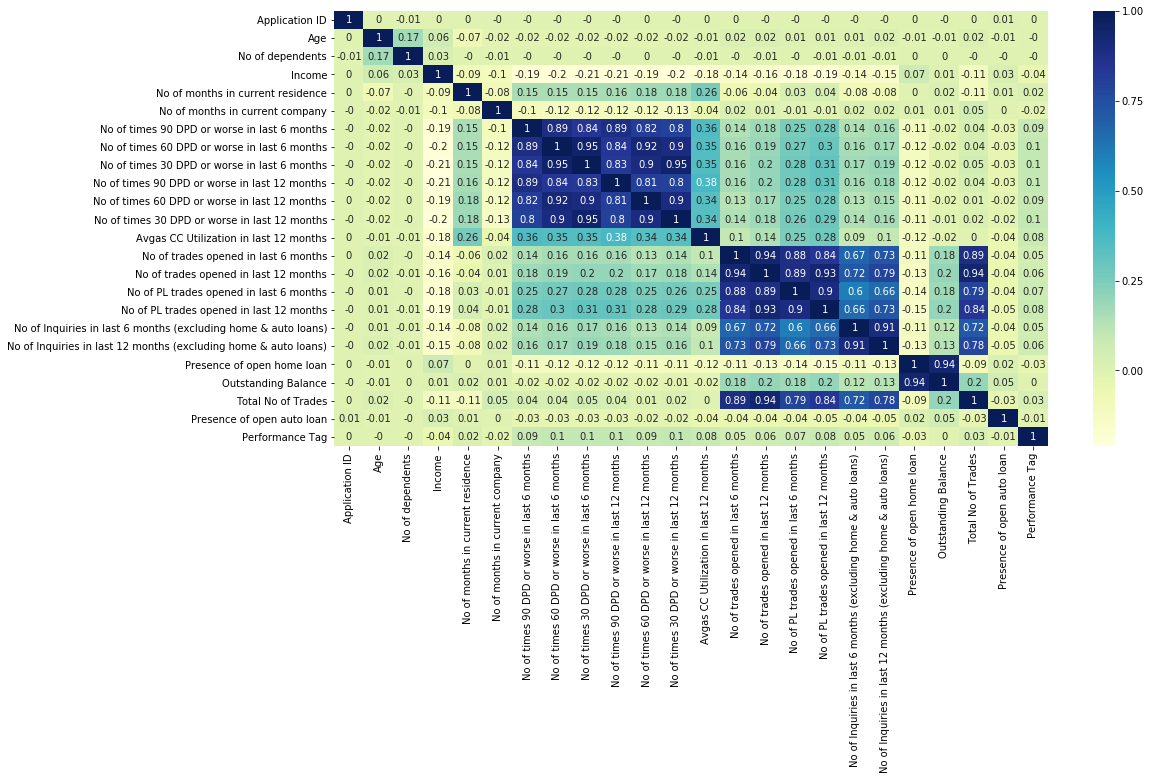

In [103]:
#Checking correlation
cor = model_data1_scaled.corr()
plt.figure(figsize=(16,8))
sns.heatmap(round(cor,2), cmap="YlGnBu", annot=True)
plt.show()
#we can see that some of the variables are highly correlated.

In [104]:
#One hot encoding for the categorical variables
model_data2 = model_data1.copy()

dummy = pd.get_dummies(model_data2[['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence']], drop_first=True)

# Adding dummies created above to the model_data2 dataframe
model_data2 = pd.concat([model_data2, dummy], axis=1)

model_data2 = model_data2.drop(['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence'], axis=1)

In [105]:
# Putting feature variable to X
X = model_data2.drop(['Performance Tag'],axis=1)

# Putting response variable to y
y = model_data2['Performance Tag']

In [106]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [107]:
#scaling 
var = ['Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months', 'Total No of Trades', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months',
       'No of trades opened in last 6 months', 'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months','No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)', 'Outstanding Balance']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train1 = X_train.copy()
X_train1 = X_train1.drop(['Application ID'],axis=1)
X_train1[var] = scaler.fit_transform(X_train1[var])
X_train1.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,...,Education_Others,Education_Phd,Education_Professional,Profession _SAL,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
50376,0.198799,-0.619898,-1.254356,0.477017,-1.241058,-0.492009,-0.507927,-0.523152,-0.542831,-0.592015,...,0,0,1,1,0,0,0,0,0,1
50875,-0.308093,1.545339,0.362537,0.340899,-0.995225,1.484760,0.786712,1.477566,0.765788,0.385995,...,0,0,0,0,1,0,0,0,0,1
22364,0.300177,0.823594,-0.607599,-0.775275,0.823938,-0.492009,-0.507927,-0.523152,-0.542831,-0.592015,...,0,0,1,1,0,0,0,0,1,0
36338,0.807069,-0.619898,0.815267,-0.775275,-0.601893,-0.492009,-0.507927,-0.523152,-0.542831,-0.592015,...,0,0,0,0,0,1,0,0,0,1
62717,-0.916364,1.545339,-1.448383,-0.475814,0.381439,-0.492009,0.786712,0.477207,-0.542831,1.364005,...,0,0,0,1,0,0,0,0,0,1


### PCA

In [108]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

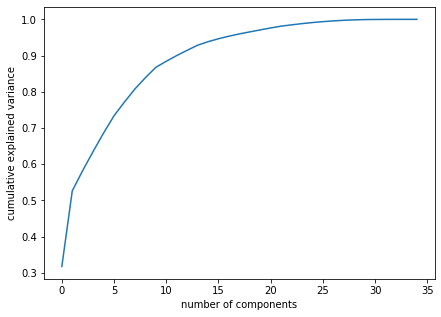

In [109]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Logistic Regression model with PCA

In [110]:
# PCA
pca = PCA()

# logistic regression
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [111]:
# fit model
model.fit(X_train1, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           multi_class='warn',
                    

In [112]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6643245304338018
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 20}


In [113]:
# predicting default on train data
y_train_pred = model.predict(X_train1)

# confusion matrix for train data
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# area under curve
y_train_pred_prob = model.predict_proba(X_train1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),2))

[[27680 18920]
 [  695  1368]]
Sensitivity: 	0.66
Specificity: 	0.59
AUC:    	 0.67


In [114]:
#Scaling test data
X_test1 = X_test.copy()
X_test1 = X_test1.drop(['Application ID'],axis=1)
X_test1[var] = scaler.transform(X_test1[var])
X_test1.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,...,Education_Others,Education_Phd,Education_Professional,Profession _SAL,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
18056,0.705691,-0.619898,-1.254356,-0.775275,-0.552726,-0.492009,-0.507927,-0.523152,-0.542831,-0.592015,...,0,0,0,0,0,1,0,0,0,1
14696,-0.206715,0.823594,-0.672274,-0.775275,0.922271,-0.492009,-0.507927,-0.523152,-0.542831,-0.592015,...,0,0,1,1,0,0,0,0,0,1
4327,-1.727391,1.545339,0.815267,-0.748051,0.971438,-0.492009,-0.507927,-0.523152,-0.542831,-0.592015,...,0,0,0,0,0,1,0,0,0,1
56436,-1.524634,-1.341643,-1.125004,0.939821,-0.700226,1.484760,0.786712,0.477207,0.765788,1.364005,...,0,0,0,1,0,0,0,0,0,1
39405,0.705691,-0.619898,-0.154869,0.967045,1.315604,-0.492009,-0.507927,-0.523152,-0.542831,-0.592015,...,0,0,1,0,0,1,0,0,0,1


In [115]:
# predicting default on test data
y_pred = model.predict(X_test1)

# confusion matrix for test data
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[11759  8222]
 [  295   580]]
Sensitivity: 	0.66
Specificity: 	0.59
AUC:    	 0.67


### Random Forest

In [116]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [117]:
# fit model
rfc.fit(X_train.iloc[:,1:], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [118]:
# predict default on train data
y_train_pred_rf = rfc.predict(X_train.iloc[:,1:])

# Printing confusion matrix for train data
print(confusion_matrix(y_train,y_train_pred_rf))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_train_pred_rf, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_train_pred_prob_rf = rfc.predict_proba(X_train.iloc[:,1:])[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob_rf),2))

[[46600     0]
 [  472  1591]]
Sensitivity: 	0.77
Specificity: 	1.0
AUC:    	 1.0


In [119]:
# predict default on test data
y_test_pred_rf = rfc.predict(X_test.iloc[:,1:])

# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_rf))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred_rf, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_test_pred_prob_rf = rfc.predict_proba(X_test.iloc[:,1:])[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob_rf),2))

[[19981     0]
 [  875     0]]
Sensitivity: 	0.0
Specificity: 	1.0
AUC:    	 0.55


#### Tuning hyperparameters

##### 1. Tuning max_depth

In [120]:
# PCA
pca = PCA()

rf1 = RandomForestClassifier(class_weight='balanced')

# create pipeline
steps1 = [("pca", pca),
         ("randomforest", rf1)
        ]

# compile pipeline
pca_rf1 = Pipeline(steps1)

# hyperparameter space
params1 = {'pca__n_components': [16,17,18,19,20], 'randomforest__max_depth': range(2, 20, 5)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model1 = GridSearchCV(estimator=pca_rf1, cv=folds, param_grid=params1, return_train_score=True, scoring='roc_auc')

model1.fit(X_train1, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('randomforest',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight='balanced',
                                                               criterion=...
                                                               min_samples_split=2,
                                                               min_

In [121]:
model1.best_params_, model1.best_score_

({'pca__n_components': 18, 'randomforest__max_depth': 2}, 0.6611505509693357)

##### 2. Tuning n_estimators

In [138]:
# PCA
pca = PCA()

rf2 = RandomForestClassifier(class_weight='balanced')

# create pipeline
steps2 = [("pca", pca),
         ("randomforest", rf2)
        ]

# compile pipeline
pca_rf2 = Pipeline(steps2)

# hyperparameter space
params2 = {'pca__n_components': [16,17,18,19,20], 'randomforest__n_estimators': range(50, 100, 10)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model2 = GridSearchCV(estimator=pca_rf2, cv=folds, param_grid=params2, return_train_score=True, scoring='roc_auc')

model2.fit(X_train1, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('randomforest',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight='balanced',
                                                               criterion=...
                                                               min_samples_split=2,
                                                               min_

In [139]:
model2.best_params_, model2.best_score_

({'pca__n_components': 17, 'randomforest__n_estimators': 80},
 0.6205188126472572)

##### 3. Tuning max_features

In [124]:
# PCA
pca = PCA()

rf3 = RandomForestClassifier(class_weight='balanced')

# create pipeline
steps3 = [("pca", pca),
         ("randomforest", rf3)
        ]

# compile pipeline
pca_rf3 = Pipeline(steps3)

# hyperparameter space
params3 = {'pca__n_components': [16,17,18,19,20], 'randomforest__max_features': [0.2, 0.4, 0.6, 0.8, 1.0]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model3 = GridSearchCV(estimator=pca_rf3, cv=folds, param_grid=params3, return_train_score=True, scoring='roc_auc')

model3.fit(X_train1, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('randomforest',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight='balanced',
                                                               criterion=...
                                                               min_weight_fraction_leaf=0.0,
                                                          

In [125]:
model3.best_params_, model3.best_score_

({'pca__n_components': 18, 'randomforest__max_features': 0.6},
 0.5587396653775807)

##### 4. Tuning min_samples_leaf

In [126]:
# PCA
pca = PCA()

rf4 = RandomForestClassifier(class_weight='balanced')

# create pipeline
steps4 = [("pca", pca),
         ("randomforest", rf4)
        ]

# compile pipeline
pca_rf4 = Pipeline(steps4)

# hyperparameter space
params4 = {'pca__n_components': [16,17,18,19,20], 'randomforest__min_samples_leaf': range(100, 300, 50)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model4 = GridSearchCV(estimator=pca_rf4, cv=folds, param_grid=params4, return_train_score=True, scoring='roc_auc')

model4.fit(X_train1, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('randomforest',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight='balanced',
                                                               criterion=...
                                                               min_weight_fraction_leaf=0.0,
                                                          

In [127]:
model4.best_params_, model4.best_score_

({'pca__n_components': 20, 'randomforest__min_samples_leaf': 200},
 0.6655645896420982)

##### 5. Tuning min_samples_split

In [128]:
# PCA
pca = PCA()

rf5 = RandomForestClassifier(class_weight='balanced')

# create pipeline
steps5 = [("pca", pca),
         ("randomforest", rf5)
        ]

# compile pipeline
pca_rf5 = Pipeline(steps3)

# hyperparameter space
params5 = {'pca__n_components': [16,17,18,19,20], 'randomforest__min_samples_split': range(500, 1000, 100)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model5 = GridSearchCV(estimator=pca_rf5, cv=folds, param_grid=params5, return_train_score=True, scoring='roc_auc')

model5.fit(X_train1, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('randomforest',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight='balanced',
                                                               criterion=...
                                                               min_weight_fraction_leaf=0.0,
                                                          

In [129]:
model5.best_params_, model5.best_score_

({'pca__n_components': 18, 'randomforest__min_samples_split': 800},
 0.6612854921296967)

#### Gridsearch to find optimal hyperparameters

In [140]:
# PCA
pca = PCA()

rf = RandomForestClassifier(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("randomforest", rf)
        ]

# compile pipeline
pca_rf = Pipeline(steps)

# hyperparameter space
param_grid = {'pca__n_components': [19,20,21],
          'randomforest__max_depth': range(2,15,5),
          'randomforest__min_samples_leaf': range(300, 1000, 200),
          'randomforest__min_samples_split': range(1000, 2000, 250),
          'randomforest__n_estimators': range(70, 100, 10), 
          'randomforest__max_features': [10, 12, 14]
         }

# create 3 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
grid_search = GridSearchCV(estimator=pca_rf, cv=folds, param_grid=param_grid, return_train_score=True, scoring='roc_auc', 
                           n_jobs = -1, verbose = 1)

In [141]:
# Fitting the grid search to the train data
grid_search.fit(X_train1,y_train)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 80.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 108.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 152.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 189.5min
[Parallel(n_jobs=-1)]: Done 3888 out of 3888 | elapsed: 254.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('randomforest',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight='balanced',
                                                               criterion=...
             param_grid={'pca__n_components': [19, 20, 21],
                         'randomforest__max_depth': range(2, 15, 5),
                      

In [142]:
# printing the Roc value for training data and hyperparameters
print("Roc:", grid_search.best_score_)
print(grid_search.best_estimator_)

Roc: 0.6740764166462879
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforest',
                 RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                        criterion='gini', max_depth=7,
                                        max_features=14, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=700,
                                        min_samples_split=1250,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=80, n_jobs=None,
                                        oob_score=False, random_state=None,
                

In [228]:
# predict default on test data
y_test_pred_rf_final = grid_search.predict(X_test1)

# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred_rf_final))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred_rf_final, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
pred = grid_search.predict_proba(X_test1)
y_test_pred_prob_rf_final = grid_search.predict_proba(X_test1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob_rf_final),2))

[[11693  8288]
 [  265   610]]
Sensitivity: 	0.7
Specificity: 	0.59
AUC:    	 0.68


## Application scorecard

In [241]:
#defining Scorecard function
def app_scorecard(X_test,y_test,pred):
    score_data = pd.concat([X_test['Application ID'],y_test], axis=1)
    score_data.rename({0:'Predicted Tag'}, axis=1, inplace=True)
    score_data['bad'] = pred[:,1]
    score_data['good'] = pred[:,0]
    score_data['odds'] = np.log(score_data['good']/score_data['bad'])
    PDO = 20.0
    BaseScore = 400.0
    Odds = 10.0
    Factor = PDO/np.log(2)
    Offset = BaseScore-(Factor*np.log(Odds))
    score_data['score'] = np.round(Offset+(Factor*score_data['odds']))
        
    score_data_sorted = score_data.sort_values(['score'], ascending = False)
    return(score_data_sorted)

In [178]:
#defining function for Cutoff score and Cutoff probability

def threshold(y_test,pred):
    PDO = 20.0
    BaseScore = 400.0
    Odds = 10.0
    Factor = PDO/np.log(2)
    Offset = BaseScore-(Factor*np.log(Odds))
    fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = pred[:,1])
    cut_off_prediction_probability_score = thresholds[np.argmax(tpr-fpr)]
    cut_off_score = np.round(Offset+(Factor*np.log(cut_off_prediction_probability_score/(1-cut_off_prediction_probability_score))))
    print("Cut Off Score for Application to Accept/Reject: ", cut_off_score)
    print("Cut Off Probability for Application to Accept/Reject: ", cut_off_prediction_probability_score)


In [242]:
#Calling above functions
scorecard = app_scorecard(X_test,y_test,pred)
threshold(y_test,pred)

Cut Off Score for Application to Accept/Reject:  332.0
Cut Off Probability for Application to Accept/Reject:  0.4893184114928699


In [243]:
#Creating Approve/Reject flag
scorecard['status'] = scorecard['score'].apply(lambda x : 'Approved' if x>= 332.0 else 'Rejected')

In [244]:
scorecard.head()

,Application ID,Performance Tag,bad,good,odds,score,status
5707,758134195,0,0.071807,0.928193,2.559263,407.0,Approved
4600,627053763,0,0.083838,0.916162,2.391308,403.0,Approved
5765,332583233,0,0.081570,0.918430,2.421209,403.0,Approved
498,253433583,0,0.083680,0.916320,2.393367,403.0,Approved
4559,102753713,0,0.085976,0.914024,2.363795,402.0,Approved


## Model Evaluation

In [171]:
#PreProcessing on Rejected Population
reject_credit = credit[credit['Performance Tag'].isnull()]
reject_demographic = demographic[demographic['Performance Tag'].isnull()]

reject_credit.replace({'Avgas CC Utilization in last 12 months' : { np.nan : 0}}, inplace=True)
reject_credit.replace({'No of trades opened in last 6 months' : { np.nan : 0}}, inplace=True)


reject_demographic.replace({'Education' : { np.nan : 'Others'}, 'Profession ' : { np.nan : 'Others'},
                        'Type of residence' : { np.nan : 'Others'}}, inplace=True)

reject_demographic.drop(columns = 'Performance Tag', inplace=True)
reject_final = reject_demographic.merge(reject_credit, on='Application ID')

reject_final = reject_final[~(reject_final['Age']<18)]
reject_final['No of months in current company'][reject_final['No of months in current company']>74] = 74

reject_final.replace({'Performance Tag' : {np.nan : 1}}, inplace=True) #Replacing with 1 i.e. Default 
reject_final['Performance Tag'] = reject_final['Performance Tag'].astype('int')
reject_final.shape

(1425, 29)

In [172]:
#One hot encoding and scaling data
reject_final2 = reject_final.copy()

dummy = pd.get_dummies(reject_final2[['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence']], drop_first=True)
reject_final2 = pd.concat([reject_final2, dummy], axis=1)
reject_final2 = reject_final2.drop(['Gender', 'Marital Status (at the time of application)', 'Education', 'Profession ', 'Type of residence'], axis=1)

# Putting feature variables to X_reject
X_reject = reject_final2.drop(['Performance Tag'],axis=1)

# Putting response variable to y_reject
y_reject = reject_final2['Performance Tag']

X_reject1 = X_reject.copy()
X_reject1 = X_reject1.drop(['Application ID'],axis=1)
X_reject1[var] = scaler.transform(X_reject1[var])


In [176]:
# predict default on reject population
y_pred_reject = grid_search.predict(X_reject1)
pred_reject = grid_search.predict_proba(X_reject1)

# Printing confusion matrix
print(confusion_matrix(y_reject,y_pred_reject))


[[1425]]


We can see above that our model has identified all the rejected population correctly as defaulters. Let's also check the application scorecard for them.

#### Checking scorecard for Rejected Population

In [238]:
reject_scorecard = app_scorecard(X_reject,y_reject,pred_reject)

In [240]:
reject_scorecard['status'] = reject_scorecard['score'].apply(lambda x : 'Approved' if x>= 332.0 else 'Rejected')
reject_scorecard.head()

,Application ID,Performance Tag,bad,good,odds,score,status
1134,157135293,1,0.535879,0.464121,-0.143765,329.0,Rejected
262,77800998,1,0.539584,0.460416,-0.158670,329.0,Rejected
578,438955356,1,0.560852,0.439148,-0.244622,327.0,Rejected
385,982628329,1,0.561784,0.438216,-0.248406,326.0,Rejected
787,657621593,1,0.566162,0.433838,-0.266211,326.0,Rejected


In [195]:
#Checking minimum score in rejected population
reject_scorecard.score.min()

304.0

Score of all the applicants in reject population is less than 332.

## Financial Benefit of model

In [257]:
#Using data of Train dataset
Total_Applications = scorecard.groupby('status')['status'].count().reset_index(name = 'Total_Applications')
No_of_Defaulters = scorecard[scorecard['Performance Tag']==1].groupby('status')['Performance Tag'].count().reset_index(name = 'No.of_Defaulters')
No_of_NON_Defaulters = scorecard[scorecard['Performance Tag']==0].groupby('status')['Performance Tag'].count().reset_index(name = 'No.of_NON_Defaulters')                                      
Applications = Total_Applications.merge(No_of_Defaulters, on='status')
Applications1 = Applications.merge(No_of_NON_Defaulters, on='status')
Applications1['%_Approve_reject'] = round((Applications1['Total_Applications']/Applications1['Total_Applications'].sum())*100,1)
Applications1['%_default'] = round((Applications1['No.of_Defaulters']/Applications1['Total_Applications'])*100,1)

In [258]:
Applications1

,status,Total_Applications,No.of_Defaulters,No.of_NON_Defaulters,%_Approve_reject,%_default
0,Approved,12587,296,12291,60.4,2.4
1,Rejected,8269,579,7690,39.6,7.0


- On Average, our model will Approve 60% credit card applications.

Assumptions:
- 100 people applied for credit card. Based on our model, 60 of them will be granted credit card and 40 will be rejected.
- Average credit loss per default is 50,000 Rs and average revenue generated from a customer is 1500 Rs.
- Default rate for Approved/Rejected applications is as per above calculations on test data.

Credit loss, if model wasn't used = ((296+579)/(12587+8269)) * 100 * 50,000 = 2,10,000 Rs

Net credit loss avoided will be difference of (Credit loss from Rejected applicants - Credit loss from Approved applicants who may default) = ((7/100) * 40) * 50,000 - ((2.4/100) * 60) * 50,000 = 68,000 Rs 

Avoided credit loss % = (68,000/2,10,000) * 100 = 32.4%

Revenue loss due to rejection of good customers = (93/100) * 40 * 1500 = 55,800 Rs
